In [277]:
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
import pandas as pd

In [278]:
depth_dict = {}
with open("/Users/dj20y461/Downloads/sample_avg_depths.txt", "r") as depths:
    for line in depths:
        sample, depth = line.strip().split("\t")
        
        depth_dict[sample] = float(depth)


In [279]:
iridovirus_covs = [] 
iridovirus_covs_dict = {} 
herpesvirus_cov_sans_ORF78s = []
herpesvirus_cov_sans_ORF78s_dict = {}
herpesvirus_cov_ORF78s = []
herpesvirus_cov_ORF78s_dict = {}

with open("/Users/dj20y461/Downloads/virus_bedcov_summary.txt", 'r') as bedcovs:
    
    headers = next(bedcovs)  # Skip the header line

    for line in bedcovs:
        sample = line.split()[0]
        iridovirus_cov = int(line.split()[1])/depth_dict[sample]
        iridovirus_covs_dict[sample] = iridovirus_cov
        herpesvirus_cov_sans_ORF78 = int(line.split()[2])/depth_dict[sample]
        herpesvirus_cov_sans_ORF78s_dict[sample] = herpesvirus_cov_sans_ORF78
        herpesvirus_cov_ORF78 = int(line.split()[3])/depth_dict[sample]
        herpesvirus_cov_ORF78s_dict[sample] = herpesvirus_cov_ORF78

        iridovirus_covs.append(iridovirus_cov)
        herpesvirus_cov_sans_ORF78s.append(herpesvirus_cov_sans_ORF78)
        herpesvirus_cov_ORF78s.append(herpesvirus_cov_ORF78)

In [280]:
print("Known iridovirus positive sample STMY_X_2011_03_all_runs scaled RBC = %s" % iridovirus_covs_dict["STMY_X_2011_03_all_runs"])
print("Known iridovirus negative sample STMY_X_2011_03_all_runs scaled RBC = %s" % iridovirus_covs_dict["RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1"])
print("Known iridovirus negative sample STMY_X_2011_03_all_runs scaled RBC = %s" % iridovirus_covs_dict["LMCK_X_X_03_all_runs"])

Known iridovirus positive sample STMY_X_2011_03_all_runs scaled RBC = 312859.57776993123
Known iridovirus negative sample STMY_X_2011_03_all_runs scaled RBC = 4.213416182401004
Known iridovirus negative sample STMY_X_2011_03_all_runs scaled RBC = 68.62641055573242


### Plotting Iridovirus hits

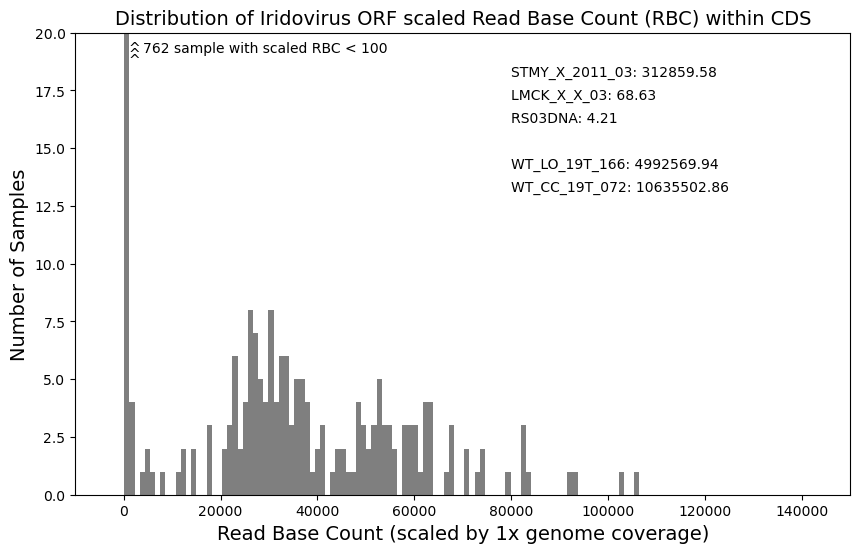

In [281]:
plt.figure(figsize=(10, 6))
cutoff = 100
plt.hist([i for i in iridovirus_covs if i > cutoff], bins=10000, alpha=0.5, label='Iridovirus ORF Coverage', color='black')

subcutoff = len([i for i in iridovirus_covs if i < cutoff])

plt.ticklabel_format(scilimits=(-5, 10))
plt.ylim(0, 20)
plt.xlim(-10000, 150000)

plt.text(80000, 18, "STMY_X_2011_03: %s" % np.round(iridovirus_covs_dict["STMY_X_2011_03_all_runs"],2), color='black', ha='left', va='bottom')
plt.text(80000, 17, "LMCK_X_X_03: %s" % np.round(iridovirus_covs_dict["LMCK_X_X_03_all_runs"],2), color='black', ha='left', va='bottom')
plt.text(80000, 16, "RS03DNA: %s" % np.round(iridovirus_covs_dict["RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1"],2), color='black', ha='left', va='bottom')

plt.text(80000, 14, "WT_LO_19T_166: %s" % np.round(iridovirus_covs_dict["WT_LO_19T_166"],2), color='black', ha='left', va='bottom')
plt.text(80000, 13, "WT_CC_19T_072: %s" % np.round(iridovirus_covs_dict["WT_CC_19T_072"],2), color='black', ha='left', va='bottom')

plt.text(4000, 19, "%s sample with scaled RBC < %s" % (subcutoff, cutoff), color='black', ha='left', va='bottom')
plt.text(1000, 19, "^", color='black', ha='left', va='bottom')
plt.text(1000, 18.75, "^", color='black', ha='left', va='bottom')
plt.text(1000, 18.5, "^", color='black', ha='left', va='bottom')

#print(iridovirus_covs_dict["STMY_X_2011_03_all_runs"])
#print(iridovirus_covs_dict["LMCK_X_X_03_all_runs"])
#print(iridovirus_covs_dict["RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1"])

plt.xlabel('Read Base Count (scaled by 1x genome coverage)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Iridovirus ORF scaled Read Base Count (RBC) within CDS', fontsize=14)

plt.show()

Most samples have RBC <100 but there are ~170 samples with signs of possible infection. However, the infection-positive sample (STMY_X_2011_03) shows (~10x) higher scaled RBC than these samples. Then there are two samples (WT_LO_19T_166, WT_CC_19T_072) with massive read counts on the iridivirus genome (15x and 33x more than STMY_X_2011_03 respectively). 

One thing that could help confirm whether this semi-normal distribution around 20-40k is real infection is to check the distribution of this signal among the lakes, and across the virus genome.

## putatively infected fish among lakes

In [282]:
put_positive_lakes = []
put_positive_fish = []
leftover_samples = []
for sample in iridovirus_covs_dict:
    if iridovirus_covs_dict[sample] > 20000:
        put_positive_lakes.append(sample.split("_")[0])
        put_positive_fish.append(sample)
    elif iridovirus_covs_dict[sample] < 100:
        leftover_samples.append(sample)


In [124]:
put_positive_fish

['LG_CL_19T_126',
 'LG_CL_19T_189',
 'LG_CL_19T_271',
 'LG_CL_19T_305',
 'LG_CL_19T_356',
 'LG_HL_19T_015',
 'LG_HL_19T_058',
 'LG_HL_19T_064',
 'LG_HL_19T_081',
 'LG_HL_19T_167',
 'LG_HL_19T_182',
 'LG_HL_19T_285',
 'LG_HL_19T_362',
 'LG_HL_19T_388',
 'LG_HL_19T_434',
 'LG_LO_19T_011',
 'LG_LO_19T_028',
 'LG_LO_19T_044',
 'LG_LO_19T_192',
 'LG_LO_19T_245',
 'LG_RL_19T_061',
 'LG_RL_19T_064',
 'LG_RL_19T_143',
 'SL_CL_19T_015',
 'SL_CL_19T_020',
 'SL_CL_19T_027',
 'SL_CL_19T_066',
 'SL_CL_19T_090',
 'SL_CL_19T_094',
 'SL_CL_19T_181',
 'SL_CL_19T_202',
 'SL_CL_19T_204',
 'SL_CL_19T_228',
 'SL_CL_19T_237',
 'SL_CL_19T_247',
 'SL_CL_19T_259',
 'SL_CL_19T_266',
 'SL_CL_19T_277',
 'SL_CL_19T_309',
 'SL_CL_19T_336',
 'SL_CL_19T_351',
 'SL_CL_19T_373',
 'SL_CL_19T_382',
 'SL_CL_19T_385_2',
 'SL_CL_19T_385',
 'SL_FL_19T_037',
 'SL_FL_19T_043',
 'SL_FL_19T_045',
 'SL_HL_19T_046',
 'SL_HL_19T_060',
 'SL_HL_19T_100',
 'SL_HL_19T_142',
 'SL_HL_19T_148',
 'SL_HL_19T_166',
 'SL_HL_19T_167',
 'SL_HL_

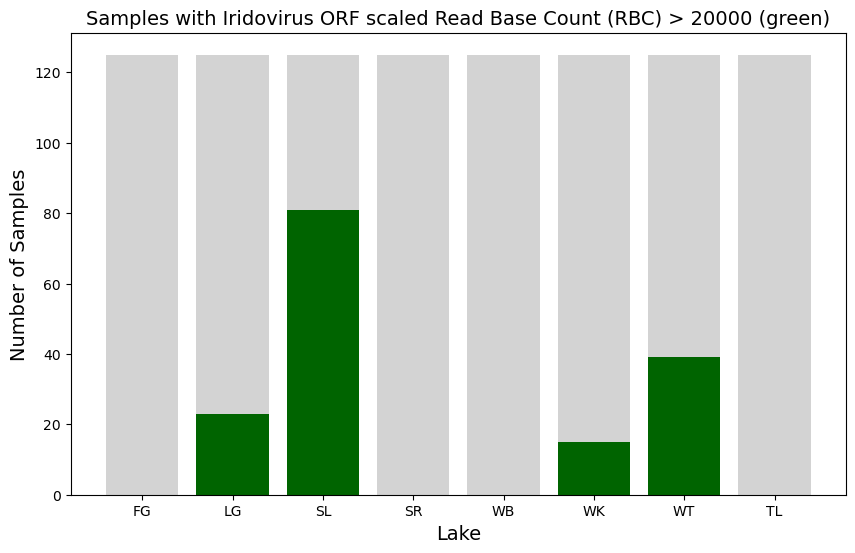

In [283]:
counts_per_lake = Counter(put_positive_lakes)
totals_per_lake = {}
totals_per_lake["FG"] = 125
totals_per_lake["LG"] = 125
totals_per_lake["SL"] = 125
totals_per_lake["SR"] = 125
totals_per_lake["WB"] = 125
totals_per_lake["WK"] = 125
totals_per_lake["WT"] = 125
totals_per_lake["TL"] = 125

plt.figure(figsize=(10, 6))
bar_index = 1
xticks = []
xticks_labels = []
for lake in totals_per_lake:

    xticks.append(bar_index)
    xticks_labels.append(lake)
    
    plt.bar(bar_index, 125, color='lightgrey')
    
    if lake in counts_per_lake:
        plt.bar(bar_index, counts_per_lake[lake], color='darkgreen')

    bar_index += 1

plt.xticks(xticks, xticks_labels)
plt.ylabel('Number of Samples', fontsize=14)
plt.xlabel('Lake', fontsize=14)
plt.title('Samples with Iridovirus ORF scaled Read Base Count (RBC) > 20000 (green)', fontsize=14)


plt.show()

Ok so pretty non-random across lakes, suggesting there is something biological, rather than artefactual going on.  

## Infection signal across the genome

### Test samples excluding WT_LO_19T_166 and WT_CC_19T_072

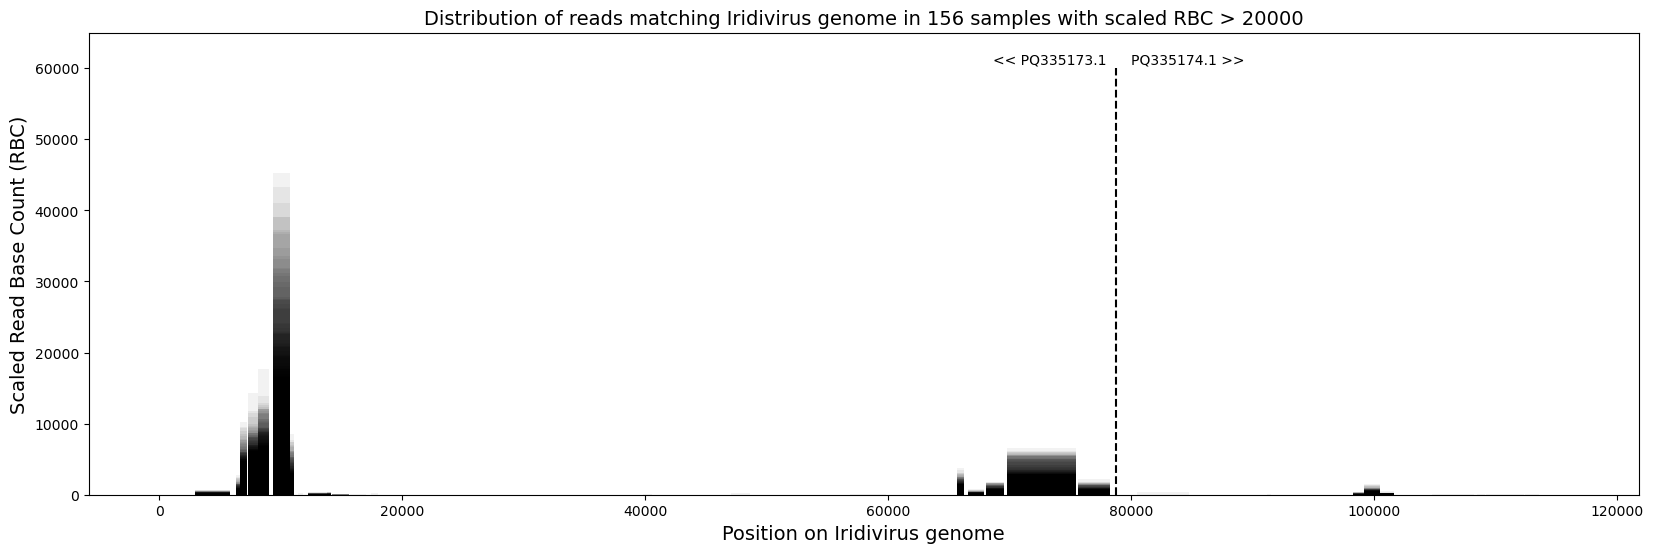

In [186]:
plt.figure(figsize=(20, 6))

sample_bedcov_dict = {}

for sample in put_positive_fish:

    if sample not in ["WT_LO_19T_166", "WT_CC_19T_072", "STMY_X_2011_03_all_runs"]:

        with open("/Users/dj20y461/Downloads/put_infected_bedcovs/%s.iridovirus.bedcov" % sample, "r") as sample_bedcov:
            for line in sample_bedcov:
                scaff, start, end, RBC = line.strip().split()
                    
                start = int(start)
                end = int(end)
                RBC = float(RBC)/depth_dict[sample]

                if scaff == "PQ335174.1":
                    start = start + 80000 ## this is the end of the first scaff, plus a couple of kb buffer. 
                    end = end + 80000

                

                centre = start + (end-start)/2
                width = end - start

                plt.bar(centre, RBC, width=width, color='black', alpha=0.05)

                

plt.ylim(0, 65000)
plt.vlines([78753], 0, 60000, color='black', linestyles='dashed')
plt.text(78000, 60250, "<< PQ335173.1", color='black', ha='right', va='bottom')
plt.text(80000, 60250, "PQ335174.1 >>", color='black', ha='left', va='bottom')

plt.title("Distribution of reads matching Iridivirus genome in 156 samples with scaled RBC > 20000", fontsize=14)
plt.xlabel("Position on Iridivirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()


        

The reads in these genomes are localised to several positions only, which doesn't seem like virus detection signal to me. It would be more consistent with these regions having been incorporated into the stickleback genome. 

In [200]:
with open("/Users/dj20y461/Downloads/leftover_samples", "w") as leftover_list:

    for sample in leftover_samples:
        leftover_list.write("%s\n" % sample)

### What about the samples with "no" reads hitting to the iridivirus genome? 

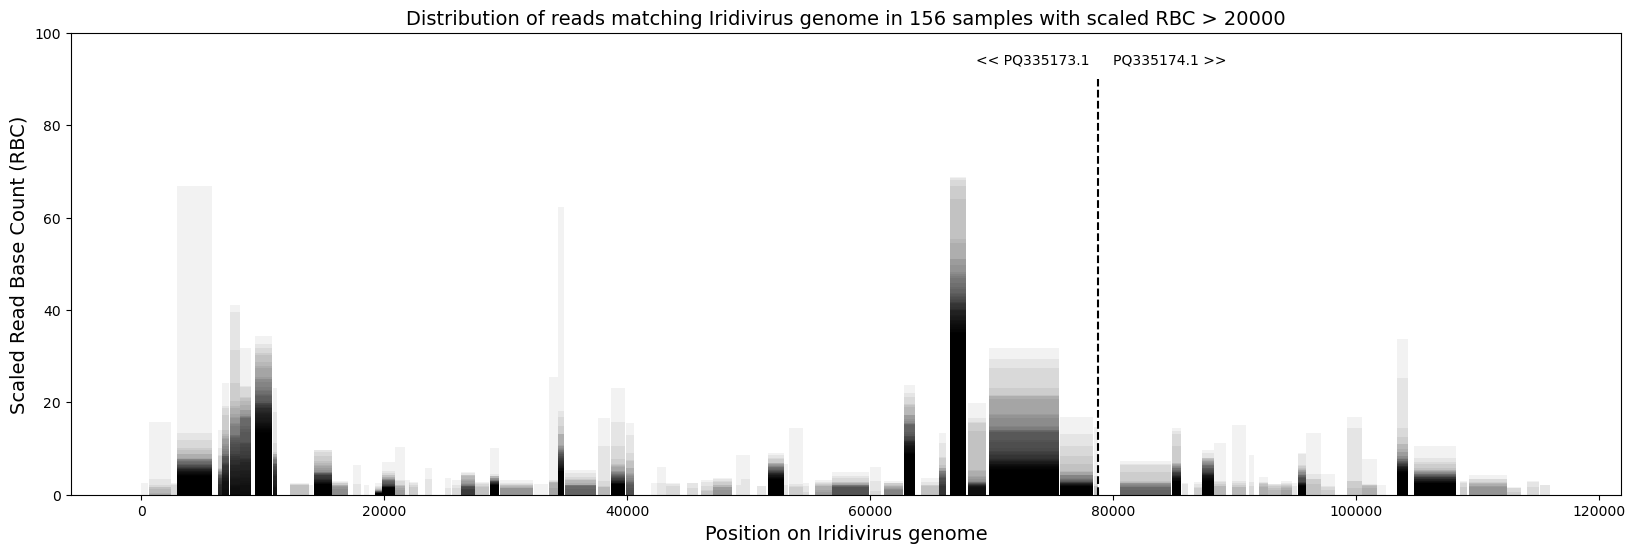

In [204]:
plt.figure(figsize=(20, 6))

sample_bedcov_dict = {}

for sample in leftover_samples:

    with open("/Users/dj20y461/Downloads/leftover_bedcovs/%s.iridovirus.bedcov" % sample, "r") as sample_bedcov:
        for line in sample_bedcov:
            scaff, start, end, RBC = line.strip().split()
                
            start = int(start)
            end = int(end)
            RBC = float(RBC)/depth_dict[sample]

            if scaff == "PQ335174.1":
                start = start + 80000 ## this is the end of the first scaff, plus a couple of kb buffer. 
                end = end + 80000

            

            centre = start + (end-start)/2
            width = end - start

            plt.bar(centre, RBC, width=width, color='black', alpha=0.05)

                

plt.ylim(0, 100)
plt.vlines([78753], 0, 90, color='black', linestyles='dashed')
plt.text(78000, 92.5, "<< PQ335173.1", color='black', ha='right', va='bottom')
plt.text(80000, 92.5, "PQ335174.1 >>", color='black', ha='left', va='bottom')

plt.title("Distribution of reads matching Iridivirus genome in 762 samples with scaled RBC < 100", fontsize=14)
plt.xlabel("Position on Iridivirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()


        

### Now checking the two outlier samples WT_LO_19T_166 and WT_CC_19T_072

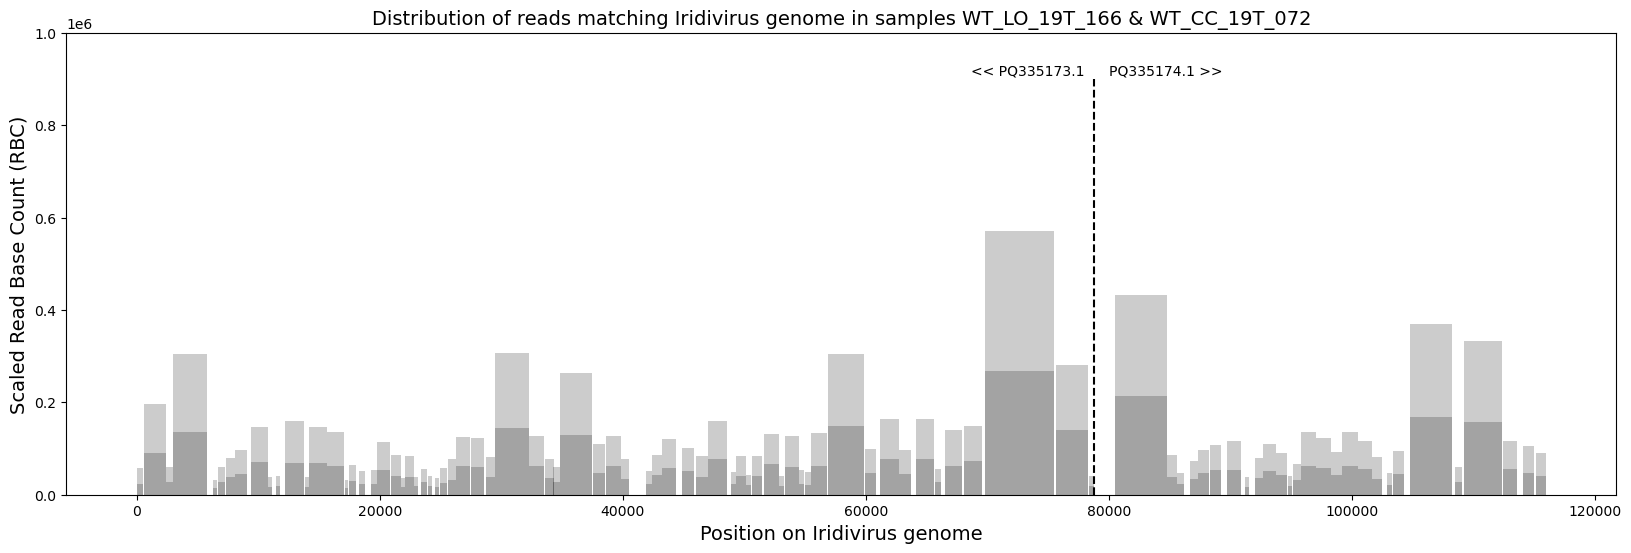

In [187]:
plt.figure(figsize=(20, 6))

# not plotting STMY_X_2011_03 for now

for sample in ["WT_LO_19T_166", "WT_CC_19T_072"]:

    with open("/Users/dj20y461/Downloads/put_infected_bedcovs/%s.iridovirus.bedcov" % sample, "r") as sample_bedcov:
        for line in sample_bedcov:
            scaff, start, end, RBC = line.strip().split()
            
            start = int(start)
            end = int(end)
            RBC = float(RBC)/depth_dict[sample]

            if scaff == "PQ335174.1":
                start = start + 80000 ## this is the end of the first scaff, plus a couple of kb buffer. 
                end = end + 80000

            centre = start + (end-start)/2
            width = end - start

            plt.bar(centre, RBC, width=width, color='black', alpha=0.2)

plt.ylim(0, 1000000)
plt.vlines([78753], 0, 900000, color='black', linestyles='dashed')
plt.text(78000, 902500, "<< PQ335173.1", color='black', ha='right', va='bottom')
plt.text(80000, 902500, "PQ335174.1 >>", color='black', ha='left', va='bottom')

plt.title("Distribution of reads matching Iridivirus genome in samples WT_LO_19T_166 & WT_CC_19T_072", fontsize=14)
plt.xlabel("Position on Iridivirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()

### For comparison, this is what the known Iridovirus-positive sample looks like

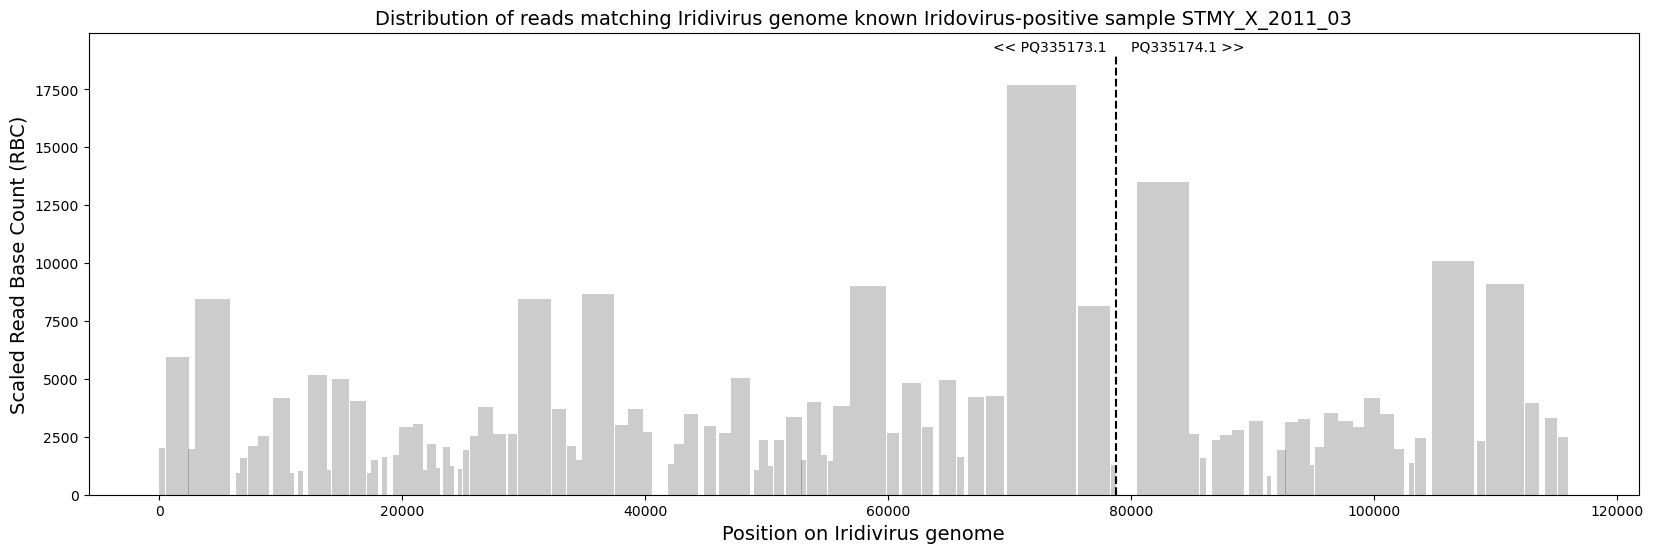

In [184]:
plt.figure(figsize=(20, 6))

# not plotting STMY_X_2011_03 for now

for sample in ["STMY_X_2011_03_all_runs"]:

    with open("/Users/dj20y461/Downloads/put_infected_bedcovs/%s.iridovirus.bedcov" % sample, "r") as sample_bedcov:
        for line in sample_bedcov:
            scaff, start, end, RBC = line.strip().split()
            
            start = int(start)
            end = int(end)
            RBC = float(RBC)/depth_dict[sample]

            if scaff == "PQ335174.1":
                start = start + 80000 ## this is the end of the first scaff, plus a couple of kb buffer. 
                end = end + 80000

            centre = start + (end-start)/2
            width = end - start

            plt.bar(centre, RBC, width=width, color='black', alpha=0.2)

#plt.ylim(0, 15000)
plt.vlines([78753], 0, 19000, color='black', linestyles='dashed')
plt.text(78000, 19025, "<< PQ335173.1", color='black', ha='right', va='bottom')
plt.text(80000, 19025, "PQ335174.1 >>", color='black', ha='left', va='bottom')

plt.title("Distribution of reads matching Iridivirus genome known Iridovirus-positive sample STMY_X_2011_03", fontsize=14)
plt.xlabel("Position on Iridivirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()

So, my interpretation would be that most samples do not show any virus, or gene incoroporation. Some (~156) show incorporation of iridivirus genes in their genomes, and 2 show actual infection. 

# Herpesvirus

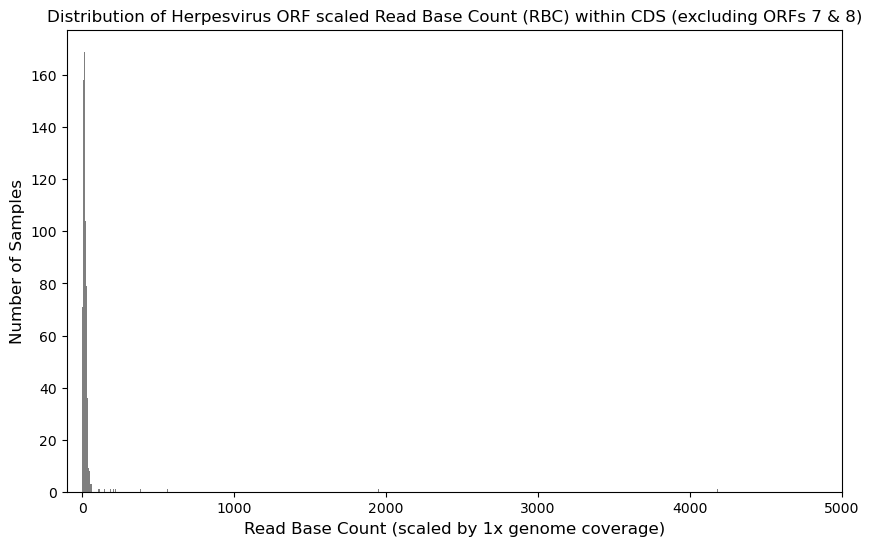

In [284]:
plt.figure(figsize=(10, 6))
cutoff = 10000
plt.hist([i for i in herpesvirus_cov_sans_ORF78s if i < cutoff], bins=1000, alpha=0.5, color='black')

subcutoff = len([i for i in herpesvirus_cov_sans_ORF78s if i < cutoff])

plt.ticklabel_format(scilimits=(-5, 10))
plt.xlim(-100, 5000)

plt.xlabel('Read Base Count (scaled by 1x genome coverage)', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Distribution of Herpesvirus ORF scaled Read Base Count (RBC) within CDS (excluding ORFs 7 & 8)', fontsize=12)

plt.show()

It seems there are really not many hits. The highest sample has around 4000. 

In [220]:
## what do the top 10 highest for herpesvirus reads look like?
sorted(herpesvirus_cov_sans_ORF78s, reverse=True)[:10]

[66498487.93798738,
 4184.8465995334855,
 3514.042758657689,
 1953.9869803052159,
 561.4455558699354,
 382.60402486872016,
 223.22978311290814,
 219.08616149142253,
 206.58007270998434,
 203.73634120549877]

Presumably the single sample with very high herpesvirus RBC is the known-positive sample. 

In [224]:
for sample in herpesvirus_cov_sans_ORF78s_dict:
    if herpesvirus_cov_sans_ORF78s_dict[sample] > 4000:
        print("%s: %s" % (sample, herpesvirus_cov_sans_ORF78s_dict[sample]))

FG_LO_19T_286: 4184.8465995334855
RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1: 66498487.93798738


Yup! 

Lets check the next highest sample just in case

In [233]:
for sample in herpesvirus_cov_sans_ORF78s_dict:
    if 4000 < herpesvirus_cov_sans_ORF78s_dict[sample] < 5000:
        print("%s: %s" % (sample, herpesvirus_cov_sans_ORF78s_dict[sample]))

FG_LO_19T_286: 4184.8465995334855


FG_LO_19T_286

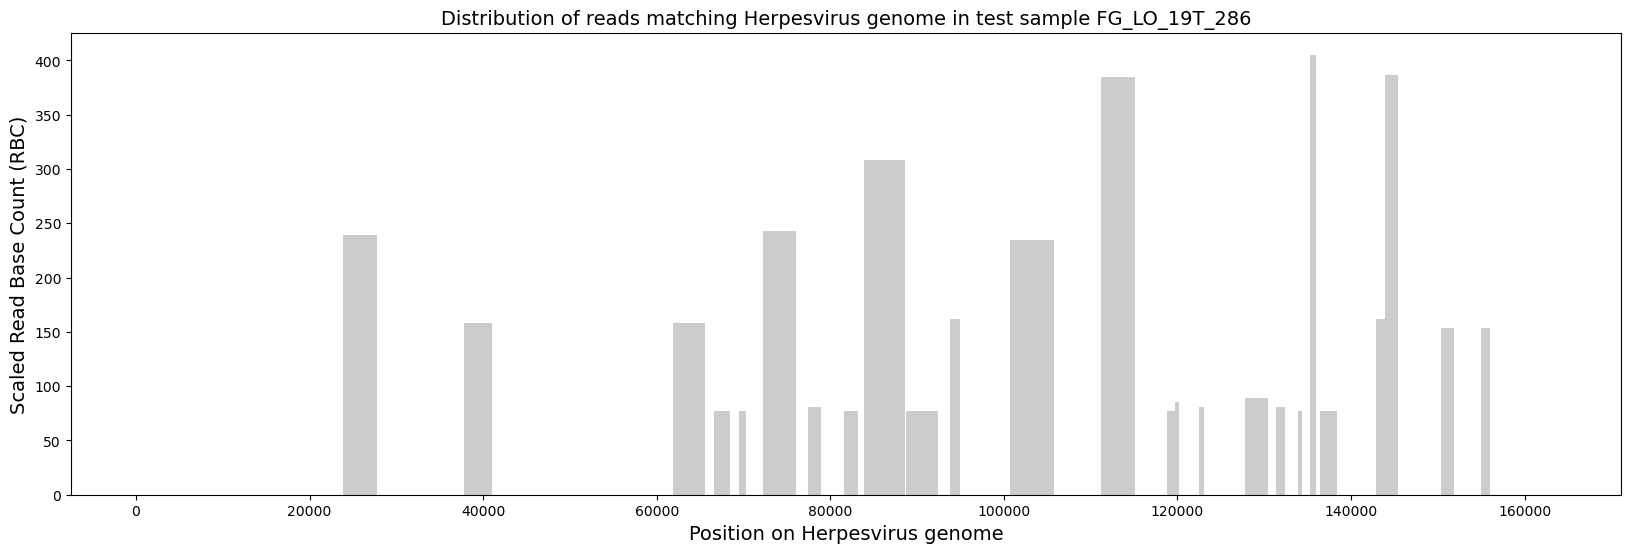

In [228]:
plt.figure(figsize=(20, 6))

for sample in ["FG_LO_19T_286"]:

    with open("/Users/dj20y461/Downloads/%s.herpes_sans_ORF7_8.bedcov" % sample, "r") as sample_bedcov:
        for line in sample_bedcov:
            scaff, start, end, RBC = line.strip().split()
            
            start = int(start)
            end = int(end)
            RBC = float(RBC)/depth_dict[sample]

            centre = start + (end-start)/2
            width = end - start

            plt.bar(centre, RBC, width=width, color='black', alpha=0.2)

plt.title("Distribution of reads matching Herpesvirus genome in test sample FG_LO_19T_286", fontsize=14)
plt.xlabel("Position on Herpesvirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()

For comparison, here is the known herpesvirus-positive sample RS03DNA

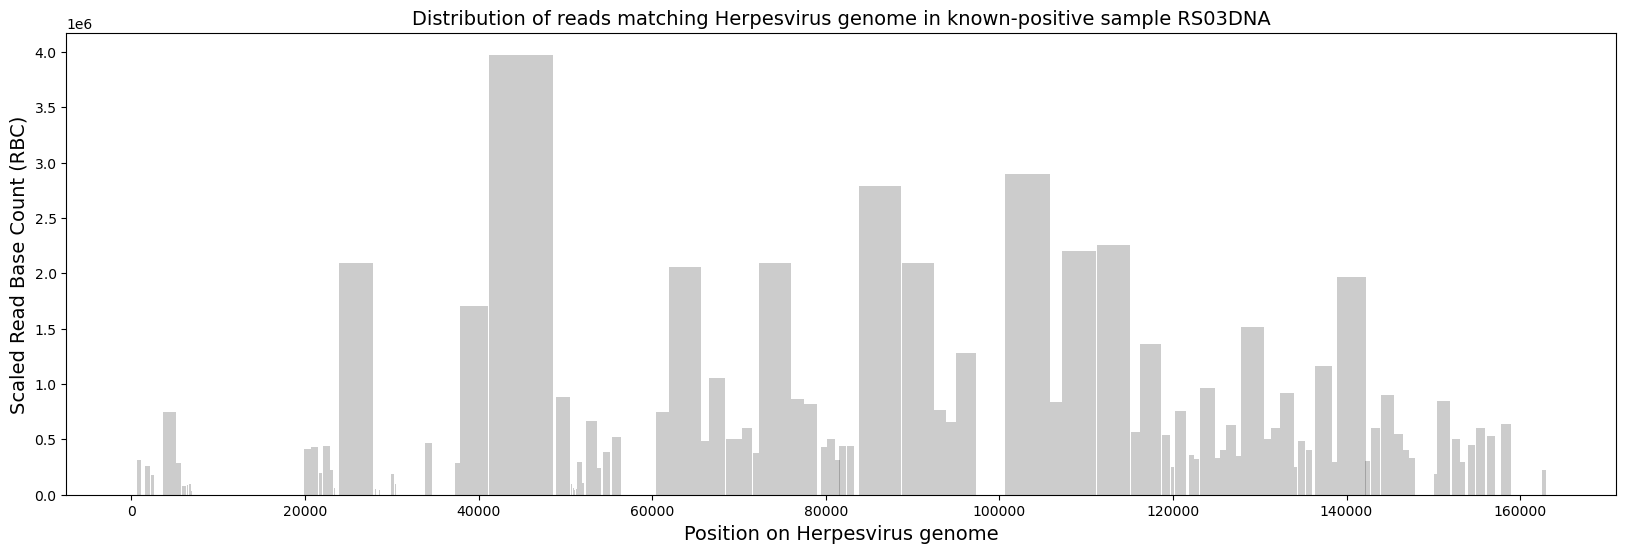

In [230]:
plt.figure(figsize=(20, 6))

for sample in ["RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1"]:

    with open("/Users/dj20y461/Downloads/%s.herpes_sans_ORF7_8.bedcov" % sample, "r") as sample_bedcov:
        for line in sample_bedcov:
            scaff, start, end, RBC = line.strip().split()
            
            start = int(start)
            end = int(end)
            RBC = float(RBC)/depth_dict[sample]

            centre = start + (end-start)/2
            width = end - start

            plt.bar(centre, RBC, width=width, color='black', alpha=0.2)

plt.title("Distribution of reads matching Herpesvirus genome in known-positive sample RS03DNA", fontsize=14)
plt.xlabel("Position on Herpesvirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()

So its possible that sample FG_LO_19T_286 could be infected, but it would be a very low infection level.  

## ECHO

In [236]:
sorted(herpesvirus_cov_ORF78s, reverse=True)[:10]

[3542934.8217780394,
 99597.38923769997,
 76603.95769270364,
 75084.9655360677,
 68909.8539069998,
 67766.63399379214,
 66674.7178407144,
 65740.95798291558,
 65030.11206506133,
 63800.6786120433]

Again I imagine the high one is the known-positive

In [240]:
for sample in herpesvirus_cov_ORF78s_dict:
    if herpesvirus_cov_ORF78s_dict[sample] > 100000:
        print("%s: %s" % (sample, herpesvirus_cov_ORF78s_dict[sample]))

RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1: 3542934.8217780394


This is actually the positive for the virus infection, rather than echo. The echo sample is LMCK_X_X_03, lets see where this falls

In [257]:
herpesvirus_cov_ORF78s_dict["LMCK_X_X_03_all_runs"]

36680.46269765467

So how does this compare to our source lake samples? 

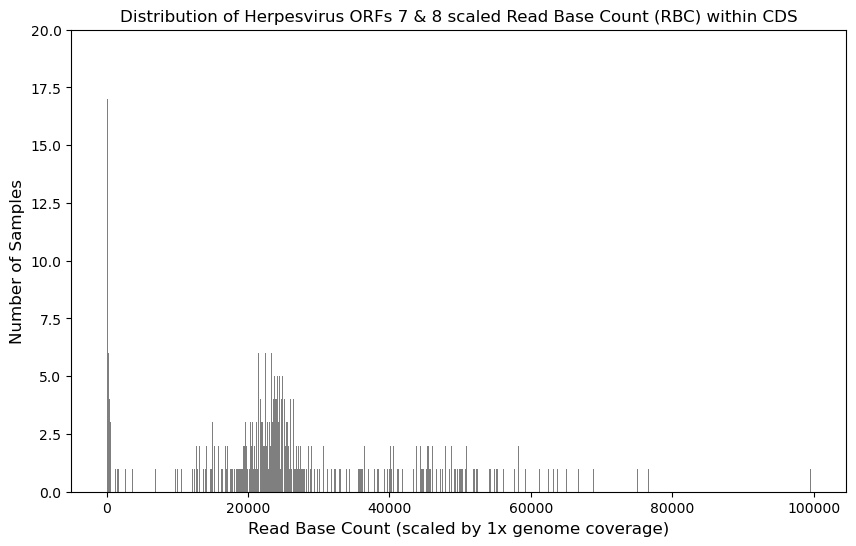

In [245]:
plt.figure(figsize=(10, 6))
cutoff = 200000
plt.hist([i for i in herpesvirus_cov_ORF78s if i < cutoff], bins=1000, alpha=0.5, color='black')

subcutoff = len([i for i in herpesvirus_cov_ORF78s if i < cutoff])

plt.ylim(0, 20)

plt.ticklabel_format(scilimits=(-5, 10))
#plt.xlim(-100, 5000)

plt.xlabel('Read Base Count (scaled by 1x genome coverage)', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Distribution of Herpesvirus ORFs 7 & 8 scaled Read Base Count (RBC) within CDS', fontsize=12)

plt.show()

Ok, so the test samples have very similar scaled RBCs to the positive control. Some even more. 

How do these distribute among lakes? 

In [285]:
herp78_put_positives_lakes = [] 
herp78_put_positives = [] 
for sample in herpesvirus_cov_ORF78s_dict:
    if 10000 < herpesvirus_cov_ORF78s_dict[sample] < 40000:
        herp78_put_positives_lakes.append(sample.split("_")[0])
        herp78_put_positives.append(sample)

In [263]:
herp78_put_positives_lake_counts = Counter(herp78_put_positives_lakes)

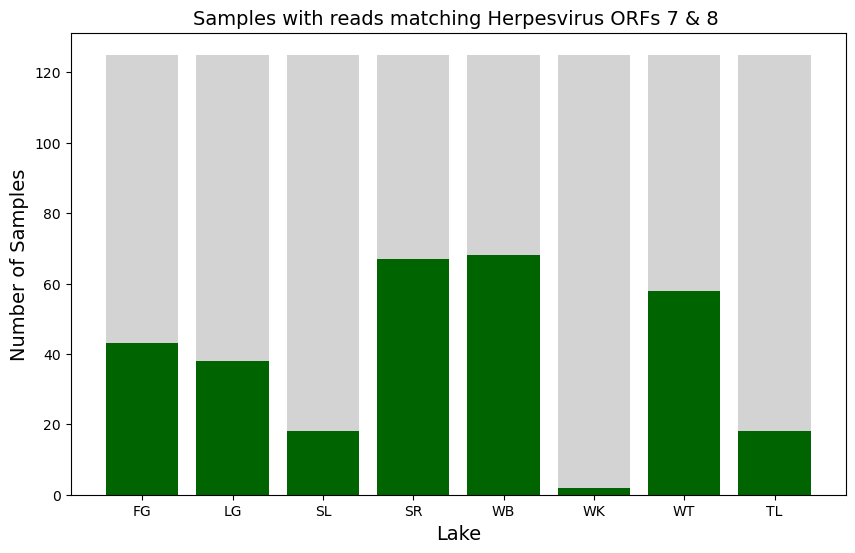

In [287]:
counts_per_lake = Counter(herp78_put_positives_lakes)
totals_per_lake = {}
totals_per_lake["FG"] = 125
totals_per_lake["LG"] = 125
totals_per_lake["SL"] = 125
totals_per_lake["SR"] = 125
totals_per_lake["WB"] = 125
totals_per_lake["WK"] = 125
totals_per_lake["WT"] = 125
totals_per_lake["TL"] = 125

plt.figure(figsize=(10, 6))
bar_index = 1
xticks = []
xticks_labels = []
for lake in totals_per_lake:

    xticks.append(bar_index)
    xticks_labels.append(lake)
    
    plt.bar(bar_index, 125, color='lightgrey')
    
    if lake in herp78_put_positives_lakes:
        plt.bar(bar_index, herp78_put_positives_lake_counts[lake], color='darkgreen')

    bar_index += 1

plt.xticks(xticks, xticks_labels)
plt.ylabel('Number of Samples', fontsize=14)
plt.xlabel('Lake', fontsize=14)
plt.title('Samples with reads matching Herpesvirus ORFs 7 & 8 ', fontsize=14)


plt.show()

Seems present in all, but very low in WK. 

In [256]:
with open("/Users/dj20y461/Downloads/herp78_put_positives.txt", "w") as herp78_put_positives_file:
    for sample in herp78_put_positives:
        herp78_put_positives_file.write("%s\n" % sample)

In [265]:
len(herp78_put_positives)

313

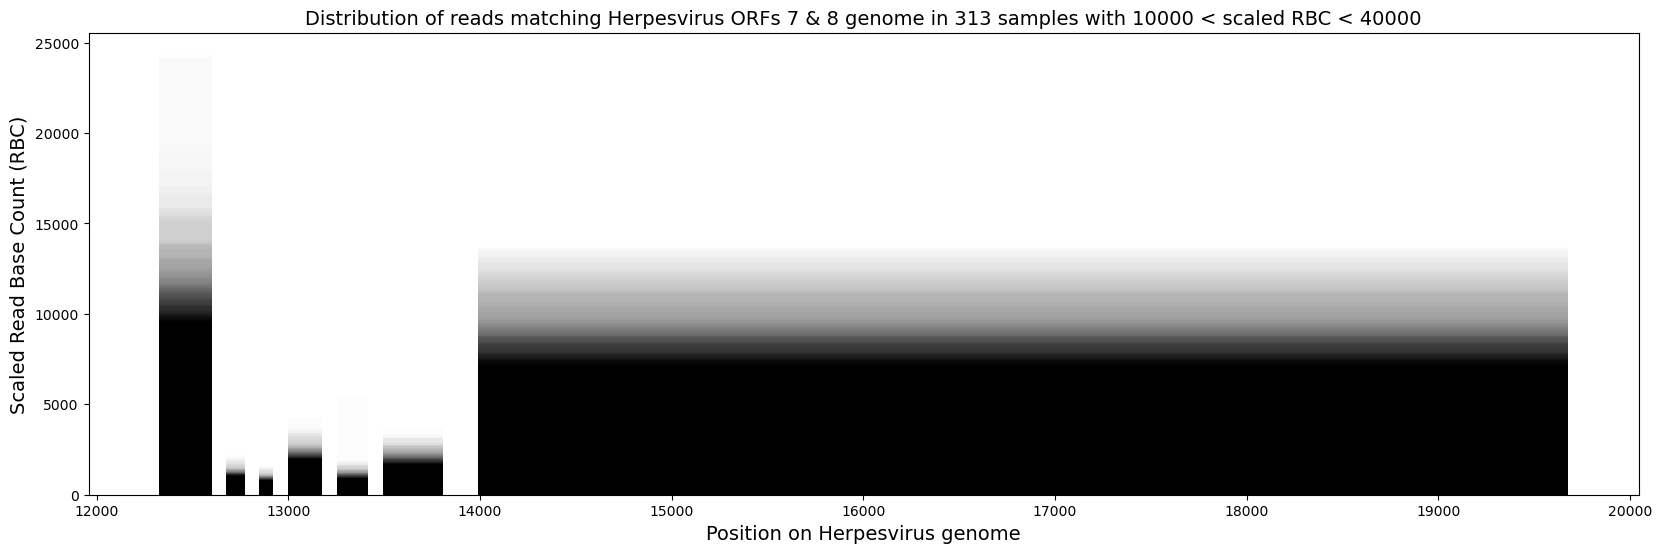

In [269]:
plt.figure(figsize=(20, 6))

sample_bedcov_dict = {}

for sample in herp78_put_positives:

    with open("/Users/dj20y461/Downloads/herp78_put_positives/%s.herpesORF7_8.bedcov" % sample, "r") as sample_bedcov:
        for line in sample_bedcov:
            scaff, start, end, RBC = line.strip().split()
                
            start = int(start)
            end = int(end)
            RBC = float(RBC)/depth_dict[sample]          

            centre = start + (end-start)/2
            width = end - start

            plt.bar(centre, RBC, width=width, color='black', alpha=0.01)

                

#plt.ylim(0, 100)

plt.title("Distribution of reads matching Herpesvirus ORFs 7 & 8 genome in 313 samples with 10000 < scaled RBC < 40000", fontsize=14)
plt.xlabel("Position on Herpesvirus genome", fontsize=14)
plt.ylabel("Scaled Read Base Count (RBC)", fontsize=14)

plt.show()


        

So there are a lot of hits for echo in these samples. . . . 

We could plot herpes vs echo hits, this might be the easiest way to check for both. 

In [274]:
herpesvirus_RBCs = []
herpesvirus_78_RBCs = []
samples = []

for sample in herpesvirus_cov_sans_ORF78s_dict:
    if sample != "RS03DNA_CSFP210008948-1a_HKGLNDSX2_L1":
        samples.append(sample)
        herpesvirus_RBCs.append(herpesvirus_cov_sans_ORF78s_dict[sample])
        herpesvirus_78_RBCs.append(herpesvirus_cov_ORF78s_dict[sample])




Text(0, 0.5, 'Herpesvirus ORFs 7 & 8 scaled Read Base Count (RBC)')

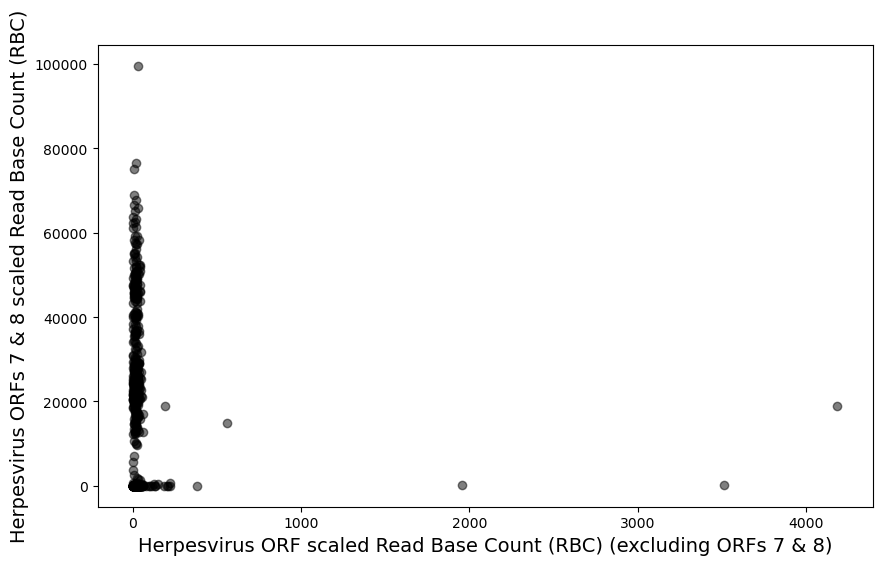

In [276]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(herpesvirus_RBCs, herpesvirus_78_RBCs, alpha=0.5, color='black')

plt.xlabel('Herpesvirus ORF scaled Read Base Count (RBC) (excluding ORFs 7 & 8)', fontsize=14)
plt.ylabel('Herpesvirus ORFs 7 & 8 scaled Read Base Count (RBC)', fontsize=14)
